In [1]:
import numpy as np
import cmath

# Q1
## Part 1 
- find eigen values and eigen vectors, and prove them

In [2]:
# make matrix
A = np.array([ [1,2,3,4,5], [2,4,7,1,2], [3,7,8,5,6], [4,1,5,8,10], [5,2,6,10,3] ])

# find eigenvalues&vectors
eigval, eigvec = np.linalg.eig(A)

eigval = list(eigval); eigvec = np.hsplit(eigvec, 5)
for i in range(5):
    print("eigen value: {}, eigenvector : {}".format(eigval[i], eigvec[i].ravel()))
    
print("=="*40)
# Check if Au = rambda * u
equal = np.equal((A@eigvec[i]).round(10), (eigval[i]*eigvec[i]).round(10))
for i in range(5):
    if np.all(equal):
        print("eigenvalue{} : Okay".format(i+1))

eigen value: 24.430095784801843, eigenvector : [-0.29288606 -0.28493924 -0.5259507  -0.55323044 -0.50033922]
eigen value: 7.775046641751196, eigenvector : [-0.09262852  0.62336304  0.51358594 -0.51566433 -0.27047782]
eigen value: -5.480047483007737, eigenvector : [-0.2869849   0.04978597 -0.15239951 -0.46978672  0.81928985]
eigen value: -0.6643075336733107, eigenvector : [-0.84008667 -0.26278468  0.39490511  0.25676754 -0.05761071]
eigen value: -2.0607874098719723, eigenvector : [ 0.34282908 -0.67726931  0.52955613 -0.37602825  0.04413126]
eigenvalue1 : Okay
eigenvalue2 : Okay
eigenvalue3 : Okay
eigenvalue4 : Okay
eigenvalue5 : Okay


## Part 2 
- Show that the eigenvalues of inv(A) are 1/rambda

In [3]:
# Get inverse matrix and eigenvalues of it
inv_A = np.linalg.inv(A)
inv_eigval, _ = np.linalg.eig(inv_A)

# Get array of reciprocals of eigenvalues of inverse matrix
rec_inv_eigval = [1/e for e in inv_eigval]
rec_inv_eigval = (np.array(rec_inv_eigval)).round(10)
rec_inv_eigval.sort()

eigval = (np.array(eigval)).round(10)
eigval.sort()

print("Is eigenvalues of inv(A) = a/eigenvalues of A ? :", np.all(rec_inv_eigval == eigval))

Is eigenvalues of inv(A) = a/eigenvalues of A ? : True


# Q2
## Part 1
- The Equation can be re-written as
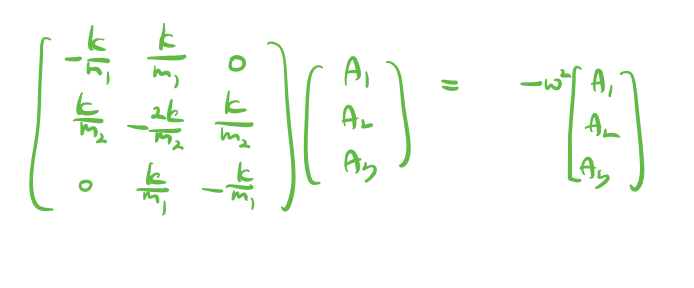
- which is EVP, w^2 is eigenvalue and [A1 A2 A3] is eigenvector

## Part 2 & 3
- solve

In [12]:
k = 1.8*(10**2); m1 = 35.45*1.6605*(10**(-27)); m2 = 9.01*1.6605*(10**(-27))

# Define system matrix
System = np.array([ [-k/m1,k/m1,0], [k/m2,-2*k/m2,k/m2], [0,k/m1,-k/m1] ])

# Get eigenvalues & vectors
eigval, eigvec = np.linalg.eig(System)

print('==='*20)
print(System@eigvec[:,0])
print(eigvec[:,0]*eigval[0])
print('==='*20)

# Calculate w
w = [cmath.sqrt(i) for i in -eigval]
print("j represents imaginary part")
for i in range(3):
    print("w {} : {}, eigenvector {} : {}".format(i,w[i],i,eigvec[:,i].ravel()))

[ 3.39210712e+27 -2.66926076e+28  3.39210712e+27]
[ 3.39210712e+27 -2.66926076e+28  3.39210712e+27]
j represents imaginary part
w 0 : (164682276800912.06+0j), eigenvector 0 : [-0.12507653  0.98423154 -0.12507653]
w 1 : (55297906879395.67+0j), eigenvector 1 : [-7.07106781e-01  3.00161497e-16  7.07106781e-01]
w 2 : 507324.8601274863j, eigenvector 2 : [0.57735027 0.57735027 0.57735027]


# Q3
## Part 1
- find the principal stresses

In [5]:
Stress = np.array([[40,20,-18],[20,28,12],[-18,12,4]])
eigval, eigvec = np.linalg.eig(Stress)
print("principal stresses at the point :", eigval)

principal stresses at the point : [-12.79691014  56.12764125  28.66926888]


## Part 2 & 3
- calculate angles that the normal to the principal plane makes with the x,y,z axis

In [6]:
# Get the normal vector of principal plane
n_direction = []
for i in range(3):
    n_direction.append(eigvec[:,i])
    
axis = np.array([[1,0,0], [0,1,0], [0,0,1]])
axis_name = ['x', 'y', 'z']

# Get all the angles
for i in range(3):
    print('='*50)
    print("Value of Principal Stress :", eigval[i])
    
    # Check if maximum, minimum, or else
    if abs(eigval[i]) == max(abs(eigval)):
        print("\nThis is Maximum Stress\n")
    
    elif abs(eigval[i]) == min(abs(eigval)):
        print("\nThis is Minimum Stress\n")
    
    else:
        print("\nThis is Medium Stress\n")
    
    print("Normal Vector of Principal Plane")
    print(n_direction[i], '\n')
    for j in range(3):
        theta = np.arccos(np.dot(axis[j,:],n_direction[i])/(np.linalg.norm(axis[j,:])*np.linalg.norm(n_direction[i]))) * 180/np.pi
        print("  Angle with {} : {}".format(axis_name[j], theta))

Value of Principal Stress : -12.796910136708938

This is Minimum Stress

Normal Vector of Principal Plane
[ 0.43518087 -0.44376464  0.78338404] 

  Angle with x : 64.20319632771204
  Angle with y : 116.34432755840403
  Angle with z : 38.42853213635711
Value of Principal Stress : 56.12764125302049

This is Maximum Stress

Normal Vector of Principal Plane
[-0.83585075 -0.52250823  0.16834091] 

  Angle with x : 146.70452874484533
  Angle with y : 121.50064965875322
  Angle with z : 80.30862969898656
Value of Principal Stress : 28.66926888368837

This is Medium Stress

Normal Vector of Principal Plane
[-0.33462087  0.72805089  0.59830659] 

  Angle with x : 109.54948467256084
  Angle with y : 43.27675898417946
  Angle with z : 53.25128758511156
